In [1]:
import pandas as pd
import os
from os import listdir
from datetime import datetime, timedelta
from tqdm import trange

# DB접속
import pymysql
import numpy as np

# 그래프
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
path = 'C:/windows/Fonts/malgun.ttf'                           # 폰트:맑은고딕
font_name = fm.FontProperties(fname=path, size=24).get_name()  
plt.rc('font', family=font_name)

# 한글정제 KoNLPy
from ckonlpy.tag import Twitter
twitter = Twitter()

# 시간기록
from datetime import datetime, timedelta
import time 
from dateutil.relativedelta import relativedelta

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 1. 자료 불러오기/가공

In [2]:
##########
# 자료 불러오기
#####

# 경로 설정
directory_name = "./review_data"

# 파일명 가져오기
file_names = listdir(directory_name)
file_names = file_names[1:]


data = pd.DataFrame()
# 전체 자료 불러오기 & 병합
for open_file in file_names:
    df_temp = pd.read_excel(directory_name +'/'+ open_file, 0)
#     df_temp = df_temp[(df_temp['구매자평점'] <= 2)]
    data = pd.concat([data, df_temp], ignore_index=True)
    
    
# 날짜 포멧 변환
data['리뷰등록일'] = data['리뷰등록일'].astype('str')
data['리뷰등록일'] = pd.to_datetime(data['리뷰등록일'])
data['리뷰등록일1'] = data['리뷰등록일'].dt.strftime('%Y-%m-%d')
data['리뷰등록일2'] = data['리뷰등록일'].dt.strftime('%Y-%m')
data['리뷰등록일3'] = data['리뷰등록일'].dt.strftime('%yY-%WW')
data['상품번호'] = data['상품번호'].astype('str')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
###############
# 2.자료 추출 : MySQL
#####
# 접속 정보 
conn = pymysql.connect(host = '10.223.7.4', user ='MAEIL_CS', password = "Maeil01!@", database='MAEIL_CS')
cursor = conn.cursor(pymysql.cursors.DictCursor)

# 쿼리실행: 전체리뷰
sql= '''select 
          mapping_key as 상품번호
        , PRODUCT_CODE
        , product_nm 
        from MAEIL_PRODUCT_MAPPING mpm 
        where company_code = '13358'
        and product_nm not like '%판촉물%'
        order by LAST_UPDUSR_PNTTM  desc
        '''
cursor.execute(sql)
df2 = cursor.fetchall()
df2 = pd.DataFrame(df2)
df2 = df2.drop_duplicates(subset=['상품번호'])


In [4]:
# 자료 합치기
df = pd.merge(data, df2, on='상품번호', how ='left')
df.product_nm = df.product_nm.str.lower() 


# 미사용 column 제거
df = df[['상품번호', '상품명', '구매자평점','포토/영상', '리뷰상세내용','등록자', '리뷰등록일1', '리뷰등록일2', '리뷰등록일3', 'PRODUCT_CODE', 'product_nm']]

In [5]:
df['리뷰상세내용'] = df['리뷰상세내용'].replace('\n', ' ' )

### Text 가공

In [6]:
###############
# Text 정제
#####

# 사전에 고유 명사 추가
twitter.add_dictionary('콜드브루', 'Noun')
twitter.add_dictionary('무설탕', 'Noun')
twitter.add_dictionary('오트밀크', 'Noun')
twitter.add_dictionary('종이빨대', 'Noun')
twitter.add_dictionary('프로틴', 'Noun')
twitter.add_dictionary('보냉백', 'Noun')
twitter.add_dictionary('라방', 'Noun')
twitter.add_dictionary('재구매', 'Noun')
twitter.add_dictionary('유통기한', 'Noun')
twitter.add_dictionary('서울우유', 'Noun')
twitter.add_dictionary('매일두유', 'Noun')
twitter.add_dictionary('바리스타', 'Noun')
twitter.add_dictionary('사은품', 'Noun')
twitter.add_dictionary('어메이징 오트', 'Noun')
twitter.add_dictionary('어메이징오트', 'Noun')
twitter.add_dictionary('언스위트', 'Noun')
twitter.add_dictionary('아몬드브리즈', 'Noun')
twitter.add_dictionary('아몬드 브리즈', 'Noun')
twitter.add_dictionary('오리지널', 'Noun')
twitter.add_dictionary('오리지날', 'Noun')
twitter.add_dictionary('언스윗트', 'Noun')
twitter.add_dictionary('의향', 'Noun')
twitter.add_dictionary('꿀맛', 'Noun')
twitter.add_dictionary('에스프레소', 'Noun')
twitter.add_dictionary('라떼', 'Noun')
twitter.add_dictionary('홈카페', 'Noun')
twitter.add_dictionary('바리스타', 'Noun')
twitter.add_dictionary('대용량', 'Noun')
twitter.add_dictionary('고소하', 'Noun')
twitter.add_dictionary('재발송', 'Noun')
twitter.add_dictionary('풍미', 'Noun')
twitter.add_dictionary('라테', 'Noun')
twitter.add_dictionary('에스프레스', 'Noun')
twitter.add_dictionary('큰팩', 'Noun')
twitter.add_dictionary('스벅', 'Noun')
twitter.add_dictionary('대용품', 'Noun')
twitter.add_dictionary('식물성', 'Noun')
twitter.add_dictionary('은은한', 'Noun')
twitter.add_dictionary('고소한', 'Noun')
twitter.add_dictionary('본연의', 'Noun')
twitter.add_dictionary('뽁뽁이', 'Noun')
twitter.add_dictionary('쇼핑백', 'Noun')
twitter.add_dictionary('브랜드데이', 'Noun')
twitter.add_dictionary('카톡딜', 'Noun')
twitter.add_dictionary('콘프라이트', 'Noun')
twitter.add_dictionary('달작지근하다', 'Verb')
twitter.add_dictionary('선식', 'Noun')
twitter.add_dictionary('고지혈', 'Noun')
twitter.add_dictionary('가성비', 'Noun')
twitter.add_dictionary('당뇨', 'Noun')
twitter.add_dictionary('찐한', 'Noun')
twitter.add_dictionary('터지다', 'Verb')

def tokenize(doc):
    result = ['/'.join(t) for t in twitter.pos(doc, norm=True, stem=True)] # ex '더빙/Norm', '나다/Verb'
    return result 

def listToString(s):  
    str1 = ""  
    for ele in s:  
        str1 += " " + ele.strip()  
    return str1

#토큰화 : 전체리뷰자료
df_temp1 = df['리뷰상세내용'].replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# regex to konlpy
token_all = [list(dict.fromkeys(tokenize(row))) for row in df_temp1]

data_trim2 = []
for i in trange(len(df_temp1)):
    t = ' '.join(token_all[i])
    data_trim2.append(t.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]",""))
    
df_temp1 = pd.DataFrame(data_trim2)
df_temp1 = df_temp1[0].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

df['token'] = df_temp1
df['token_attribution'] = token_all
df['lenght'] = df['token_attribution'].str.len()
df['token_attribution2'] = data_trim2

df = df.sort_values(by ='lenght', axis=0, ascending=False, ignore_index = True)


100%|██████████████████████████████████████████████████████████████████████| 154710/154710 [00:00<00:00, 460374.28it/s]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: FutureWarning: The default value of regex will change from True to False in a future version.


In [7]:

###############
# 필터링 후 키워드 입력, "중요도 역순"으로 진행
#####

# 미분류값 fill
df['GROUP2'] = '(미분류)'
df['GROUP1'] = '(미분류)'

def get_keyword(keyword, gubun1, gubun2 ):
    df.loc[(df['token'].str.contains(str(keyword))), 'KEYWORD'] = keyword
    df.loc[(df['KEYWORD'] ==keyword), 'GROUP2'] = gubun2
    df.loc[(df['KEYWORD'] ==keyword), 'GROUP1'] = gubun1


keyword0 = ['라방', '라이브', '유투브' , '가격', '행사', '쿠폰', '사은품', '적립', '포인트',
           ] 
for word in keyword0:
    get_keyword(word, '유통', '판촉')


keyword8 = ['맛', '밍밍', '고소', '비리다', '냄새', '맛없다', '달다', 
            '단백','담백', '칼로리', '달달', '담백', '꿀', '꿀맛',
            '취향', '고소하', '향료', '식물성', '무설탕', '고소한', '은은한', 
            '짜다', '당뇨',
           ]
for word in keyword8:
    get_keyword(word, '제품', '맛(미각)')



keyword8 = ['향료', '비리다', '냄새',
            '텁텁', '진하다', '풍미', '거품', '부드럽다', '걸쭉',]
for word in keyword8:
    get_keyword(word, '제품', '맛(촉각/후각)')


    
keyword4 = ['라떼', '에스프레소', '커피', '홈카페', '바리스타', '대체' ,'콜드브루', '라테','에스프레스', '스벅', '코코아' ]
for word in keyword4:
    get_keyword(word, '제품', '카페 음용')   


keyword5 = ['서울우유','귀리', '귀리우유','오트밀크', '오틀리','오리지날', '언스위트', '어메이징', '오트밀']
for word in keyword5:
    get_keyword(word, '제품', '오트음료 대체' )   


keyword7 = ['우유', '프리미엄', '유당', '대용품']
for word in keyword7:
    get_keyword(word, '제품', '우유 대체')


keyword6 = ['베지밀', '두유', '타 브랜드', '칼슘',]
for word in keyword6:
    get_keyword(word, '제품', '두유 대체')


# 제품 키워드1
keyword1 = ['아몬드','아몬드 브리즈', '브리즈', '아몬드브리즈', '아몬드브리즈']
for word in keyword1:
    get_keyword(word, '제품', '아몬드유 대체')

# 제품 키워드2
keyword3 = ['아침', '식사','대용', '간편', '가볍게', '배고프다', '다이어트', '식단' ]
for word in keyword3:
    get_keyword(word, '제품', '식사대용')
    
# 제품 키워드2
keyword2 = ['빨대', '환경','패키지', '대용량', '뚜껑', '큰팩', '쓰레기', '플라스틱', '종이가방']
for word in keyword2:
    get_keyword(word, '제품', '환경(종이빨대 등)')




keyword0 = ['꼼꼼', '빠르다', '배송','택배', '반품', '환불', '느리다',
            '파업', '늦다', '취소',  '발송', '택배기사', '지연', '출고', '당일',
           ] 
for word in keyword0:
    get_keyword(word, '유통', '배송')

keyword0 = ['유통기한', '임박', 
           ] 
for word in keyword0:
    get_keyword(word, '유통', '유통기한')

# 배송 키워드검수
keyword0 = ['터지다', '깨다', '포장', '상자', '찌그러지다', '테이프', '찢어지다',  '완충재', '검수', '대응', '흘러나오다',
            '뽁뽁이', '리본', '짓눌리다', '구기다'
           ] 
for word in keyword0:
    get_keyword(word, '유통', '제품포장')

    
# 배송 키워드검수
keyword0 = [ '녹다', '누수', '아이스팩',  '젖다', '아이스박스', '아이스팩' , '얼음', '냉동'
           ] 
for word in keyword0:
    get_keyword(word, '유통', '제품포장')



In [8]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity
# from sentence_transformers import SentenceTransformer

# import numpy as np
# import itertools
# import pandas as pd

In [9]:
# start_dt = datetime.today() - timedelta(days = 7)
# len(df[df['리뷰등록일3'] ==start_dt.strftime('%yY-%WW')].리뷰상세내용)

# doc = listToString(df[df['리뷰등록일3'] ==start_dt.strftime('%yY-%WW')].리뷰상세내용.sample(frac = 1))

In [10]:
# tokenized_doc = twitter.pos(doc)
# tokenized_nouns = ' '.join([word[0] for word in tokenized_doc if (word[1] == 'Noun') | (word[1] == 'Verb') | (word[1] == 'Adjective')])

# # 2음절 ~ 3음절
# n_gram_range = (2, 3)

# count = CountVectorizer(ngram_range=n_gram_range).fit([tokenized_nouns])
# candidates = count.get_feature_names()

# print('trigram 개수 :',len(candidates))
# print('trigram 10개만 출력 :',candidates[0:9])

In [11]:
# model = SentenceTransformer('sentence-transformers/xlm-r-100langs-bert-base-nli-stsb-mean-tokens') # OK / 10분?

In [12]:
# 문서간 유사도
# doc_embedding = model.encode([doc])

# 단어간 유사도 : 30분 초과시 pass
# candidate_embeddings = model.encode(candidates)

In [13]:
def max_sum_sim(doc_embedding, candidate_embeddings, words, top_n, nr_candidates):
    # 문서와 각 키워드들 간의 유사도
    distances = cosine_similarity(doc_embedding, candidate_embeddings)

    # 각 키워드들 간의 유사도
    distances_candidates = cosine_similarity(candidate_embeddings, candidate_embeddings)

    # 코사인 유사도에 기반하여 키워드들 중 상위 top_n개의 단어를 pick.
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # 각 키워드들 중에서 가장 덜 유사한 키워드들간의 조합을 계산
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]



def mmr(doc_embedding, candidate_embeddings, words, top_n, diversity):

    # 문서와 각 키워드들 간의 유사도가 적혀있는 리스트
    word_doc_similarity = cosine_similarity(candidate_embeddings, doc_embedding)

    # 각 키워드들 간의 유사도
    word_similarity = cosine_similarity(candidate_embeddings)

    # 문서와 가장 높은 유사도를 가진 키워드의 인덱스를 추출.
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # keywords_idx = [2]
    keywords_idx = [np.argmax(word_doc_similarity)]

    # 가장 높은 유사도를 가진 키워드의 인덱스를 제외한 문서의 인덱스들
    # 만약, 2번 문서가 가장 유사도가 높았다면
    # ==> candidates_idx = [0, 1, 3, 4, 5, 6, 7, 8, 9, 10 ... 중략 ...]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    # 최고의 키워드는 이미 추출했으므로 top_n-1번만큼 아래를 반복.
    # ex) top_n = 5라면, 아래의 loop는 4번 반복됨.
    for _ in range(top_n - 1):
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # MMR을 계산
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # keywords & candidates를 업데이트
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

In [14]:
# # KeyBERT : 기본
# top_n = 15
# distances = cosine_similarity(doc_embedding, candidate_embeddings)
# keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]

In [15]:
# keywords2 =  max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=15, nr_candidates=20)

In [16]:
# keywords3 = mmr(doc_embedding, candidate_embeddings, candidates, top_n=15, diversity=0.8)

In [17]:
# df_k = pd.DataFrame()
# df_k['BERT'] =  keywords
# df_k['BERT_MMS'] =  keywords2
# df_k['BERT_MMR'] =  keywords3

In [18]:
# df_k

In [19]:
# Excel 자료 저장 v2
# date2 = (datetime.today()- timedelta(days=5)).strftime('%yY_%VW')
# writer = pd.ExcelWriter('./'+ date2 + '_review_rawdata.xlsx')
# data[data['리뷰등록일3']=='22Y-09W'].to_excel(writer, 'Sheet1')

# writer.save()
# writer.close()

In [20]:
# 라이브 방송 현황 : 지난주
import requests
import re
from pandas import json_normalize
import pandas as pd
# from bs4 import BeautifulSoup
# import chromedriver_autoinstaller

# 라이브방송 
url = 'https://apis.naver.com/selectiveweb/live_commerce_web/v2/broadcast-owner/290/broadcasts?sort=LATEST&pageNum=1&pageSize=20'
lm_json = requests.get(url).json()

df_naver_live = json_normalize(lm_json['list'])
df_naver_live = df_naver_live[['broadcastTitle','displayProduct.brandName',  'expectedStartDate' , 'broadcastReplayEndUrl']]
df_naver_live['expectedStartDate'] = pd.to_datetime(df_naver_live['expectedStartDate'])
df_naver_live['gubun'] = '라이브'


# 콜라보
url = 'https://apis.naver.com/selectiveweb/live_commerce_web/v2/broadcast-owner/290/collabo-broadcasts?orderType=LATEST&pageNum=1&pageSize=20'
lm_json = requests.get(url).json()

df_naver_cola = json_normalize(lm_json['list'])
df_naver_cola = df_naver_cola[['broadcastTitle','displayProduct.brandName',  'expectedStartDate' , 'broadcastReplayEndUrl']]
df_naver_cola['expectedStartDate'] = pd.to_datetime(df_naver_cola['expectedStartDate'])
df_naver_cola['gubun'] = '콜라보'


df_live = pd.concat([df_naver_live, df_naver_cola], ignore_index=True)

start_dt = datetime.today() - timedelta(days = 9) # 지난주 일요일

title2_A_image = df_live[df_live.expectedStartDate >= start_dt ]

In [21]:
# df_live[df_live.expectedStartDate >= start_dt ]['broadcastReplayEndUrl']

In [22]:
# title2_A_image

In [23]:
df_live.head(10)

,broadcastTitle,displayProduct.brandName,expectedStartDate,broadcastReplayEndUrl,gubun
0,매일유업 대표음료가 🌸봄 소풍 준비해봄🌸,더그레잇티,2023-04-10 10:00:30.834,https://view.shoppinglive.naver.com/replays/91...,라이브
1,"어메이징 오트 카페, 서촌 매일유업 곡물음료 라이브",어메이징오트,2023-04-17 10:00:50.993,https://view.shoppinglive.naver.com/replays/91...,라이브
2,봄맞이 매일유업 식물성 음료 혜택 네버엔딩,어메이징오트,2023-04-03 10:00:44.035,https://view.shoppinglive.naver.com/replays/90...,라이브
3,어메이징위크 매일유업 식물성음료 찐찐찐_찐!막방송,어메이징오트,2023-03-19 20:00:39.107,https://view.shoppinglive.naver.com/replays/87...,라이브
4,매일유업🌼신학기 온 가족 유제품 최대 50%할인대전,소화가잘되는우유,2023-03-16 11:00:43.481,https://view.shoppinglive.naver.com/replays/89...,라이브
5,★상하키친★ 봄맞이 간편식 특가라이브,상하키친,2023-03-16 10:00:42.055,https://view.shoppinglive.naver.com/replays/89...,라이브
6,[무인쇼핑 앵콜] 매일유업 식물성음료 역대급 할인,매일유업,2023-03-15 14:00:45.487,https://view.shoppinglive.naver.com/replays/88...,라이브
7,23년 새학기는 상하목장과 함께! ~52%,상하목장,2023-03-15 10:00:54.693,https://view.shoppinglive.naver.com/replays/87...,라이브
8,화이트데이 특집 ❤ 그릭요거트 구매 찬스,매일바이오,2023-03-14 10:00:32.110,https://view.shoppinglive.naver.com/replays/87...,라이브
9,"앱솔루트,요미요미, 맘마밀 유아식 대전",맘마밀,2023-03-13 13:00:29.102,https://view.shoppinglive.naver.com/replays/87...,라이브


In [24]:
start_dt = datetime.today() - timedelta(days = 15)
end_dt = datetime.today() - timedelta(days = 1)
# start_wt = start_dt.strftime('%yY-%WW')

print(start_dt,   end_dt)

df_live_week = df_live[(df_live.expectedStartDate >= start_dt) & (df_live.expectedStartDate <= end_dt) ].reset_index(drop= True)

2023-03-19 11:13:00.971880 2023-04-02 11:13:00.971880


In [25]:
start_dt, end_dt

(datetime.datetime(2023, 3, 19, 11, 13, 0, 971880),
 datetime.datetime(2023, 4, 2, 11, 13, 0, 971880))

In [26]:
df_live_week

,broadcastTitle,displayProduct.brandName,expectedStartDate,broadcastReplayEndUrl,gubun
0,어메이징위크 매일유업 식물성음료 찐찐찐_찐!막방송,어메이징오트,2023-03-19 20:00:39.107,https://view.shoppinglive.naver.com/replays/87...,라이브


In [27]:
list(df_live_week.index)

[0]

In [28]:
def shoppinglive_porduct(index):
    i = int(index)
    code_ = re.findall('[0-9]+', df_live_week.broadcastReplayEndUrl[i])[0]
    url = 'https://apis.naver.com/live_commerce_web/viewer_api_web/v1/broadcast/'+str(code_)+'?needTimeMachine=true'
    naver_shopping = requests.get(url).json()

    for j in range(0,4):
        prod = naver_shopping['shoppingProducts'][j]['name']
        code = naver_shopping['shoppingProducts'][j]['key']
        print(code, prod)

In [29]:
# shoppinglive_porduct('0')

In [30]:
# df_live_week['broadcastReplayEndUrl'][3]

### 1.평점 현황

In [31]:
# 리뷰 겟수
report02_month = pd.pivot_table(df, values='구매자평점', columns=['리뷰등록일2'],  aggfunc='count').fillna(0)
report02_week  = pd.pivot_table(df, values='구매자평점', columns=['리뷰등록일3'],  aggfunc='count').fillna(0)
report02_day   = pd.pivot_table(df, values='구매자평점', columns=['리뷰등록일1'],  aggfunc='count').fillna(0)

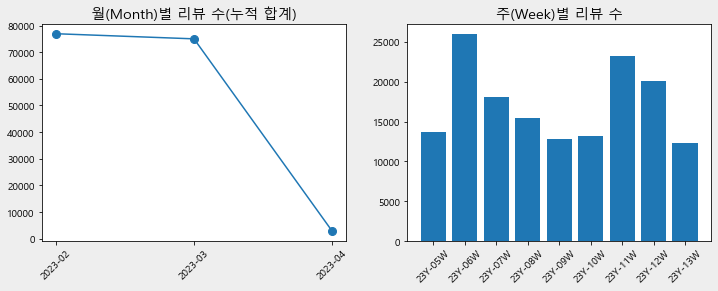

In [133]:

mpl.rc('figure', figsize=(12,4))

fig = plt.figure(facecolor='#eeeeee')

plt.subplot(1,2,1)
plt.title('월(Month)별 리뷰 수(누적 합계)', size='x-large')
plt.plot(report02_month.columns, report02_month.values[0],  marker="o", markersize  = 8)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('주(Week)별 리뷰 수', size='x-large')
plt.bar(report02_week.columns, report02_week.values[0])
plt.xticks(rotation=45)
plt.show()

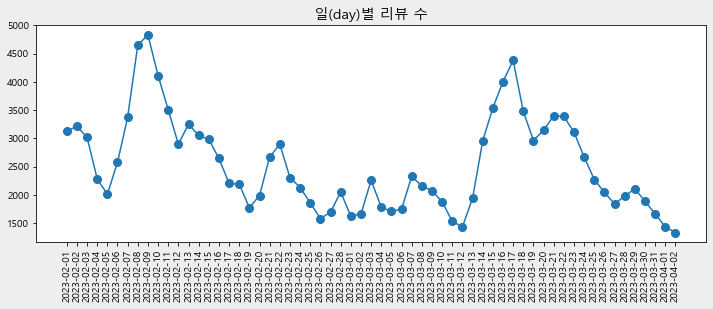

In [134]:
fig = plt.figure(facecolor='#eeeeee')

plt.title('일(day)별 리뷰 수', size='x-large')
plt.plot(report02_day.columns, report02_day.values[0],  marker="o", markersize  = 8)
plt.xticks(rotation=90)
plt.savefig('title2_A_image.png', bbox_inches='tight', facecolor='#eeeeee', dpi=80)
plt.show()

In [34]:
report02_month

리뷰등록일2,2023-02,2023-03,2023-04
구매자평점,76932,75005,2773


In [35]:
report02_t   = pd.pivot_table(df[df['구매자평점']<= 2 ], values='구매자평점', columns=['리뷰등록일3'],  aggfunc='count').fillna(0)

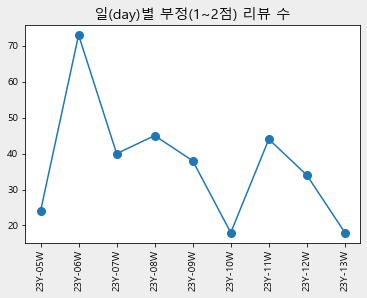

In [36]:
fig = plt.figure(facecolor='#eeeeee')

plt.title('일(day)별 부정(1~2점) 리뷰 수', size='x-large')
plt.plot(report02_t.columns, report02_t.values[0],  marker="o", markersize  = 8)
plt.xticks(rotation=90)
plt.savefig('title2_A_image.png', bbox_inches='tight', facecolor='#eeeeee', dpi=80)
plt.show()

In [37]:
# df[(df['구매자평점']<= 2 ) & (df['리뷰등록일3']<= '22Y-20W')].groupby('product_nm')['상품명'].count()

In [38]:
pivot_df = df[(df['구매자평점']<= 2 ) ].pivot_table(index='리뷰등록일3', columns='GROUP1', values='구매자평점', aggfunc='count')

In [39]:
pivot_df

GROUP1,(미분류),유통,제품
리뷰등록일3,,,
23Y-05W,6,12,6
23Y-06W,21,31,21
23Y-07W,2,18,20
23Y-08W,12,21,12
23Y-09W,13,12,13
23Y-10W,6,2,10
23Y-11W,10,20,14
23Y-12W,8,18,8
23Y-13W,4,10,4


<Figure size 432x288 with 0 Axes>

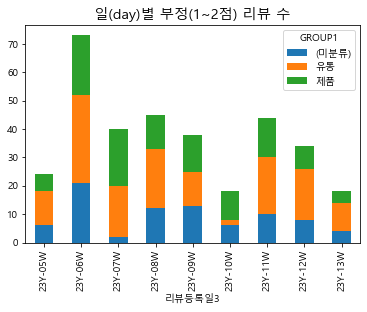

In [40]:
fig = plt.figure(facecolor='#eeeeee')
pivot_df.plot.bar(stacked=True)
plt.title('일(day)별 부정(1~2점) 리뷰 수', size='x-large')
plt.xticks(rotation=90)
plt.show()

In [41]:
# 리뷰 평점
report01_month = pd.pivot_table(df, values='구매자평점', columns=['리뷰등록일2'],  aggfunc=np.mean).fillna(0)
report01_day   = pd.pivot_table(df, values='구매자평점', columns=['리뷰등록일1'],  aggfunc=np.mean).fillna(0)
report01_week  = pd.pivot_table(df, values='구매자평점', columns=['리뷰등록일3'],  aggfunc=np.mean).fillna(0)

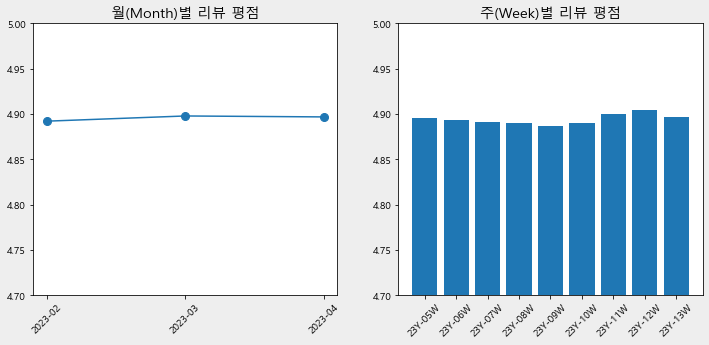

In [42]:
mpl.rc('figure', figsize=(12,5))

fig = plt.figure(facecolor='#eeeeee')

plt.subplot(1,2,1)
plt.title('월(Month)별 리뷰 평점', size='x-large')
plt.plot(report01_month.columns, report01_month.values[0],  marker="o", markersize  = 8)
plt.ylim(4.7, 5)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.title('주(Week)별 리뷰 평점', size='x-large')
plt.bar(report01_week.columns, report01_week.values[0])
plt.ylim(4.7, 5)
plt.xticks(rotation=45)
plt.show()

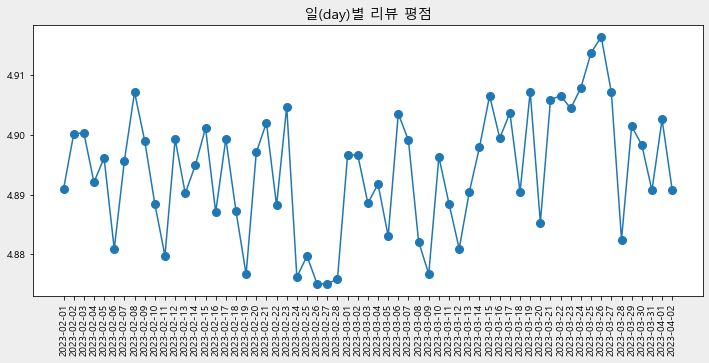

In [43]:
fig = plt.figure(facecolor='#eeeeee')

plt.title('일(day)별 리뷰 평점', size='x-large')
plt.plot(report01_day.columns, report01_day.values[0],  marker="o", markersize  = 8)
plt.xticks(rotation=90)
plt.savefig('title3_A_image.png', bbox_inches='tight', facecolor='#eeeeee', dpi=80)
plt.show()

In [44]:
report01_month

리뷰등록일2,2023-02,2023-03,2023-04
구매자평점,4.892165,4.8979,4.896863


In [45]:
df_report_02 = pd.pivot_table(df, values='구매자평점', index=['product_nm'],columns=['리뷰등록일2'], aggfunc=np.mean).fillna(0)
df_report_02 = df_report_02.sort_values(df_report_02.columns[-1], ascending = False)

In [46]:
# df_report_023 = pd.pivot_table(df[df['리뷰등록일3']!= '22Y-17W'], values='상품번호', columns=['리뷰등록일3'],  aggfunc='count').fillna(0)
# df_report_023 = df_report_023.sort_values(df_report_023.columns[-1], ascending = False)

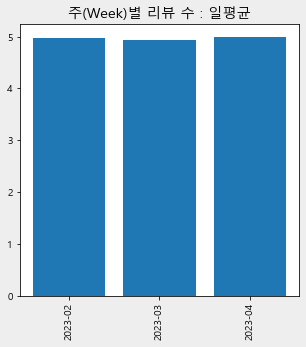

In [47]:
mpl.rc('figure', figsize=(5,5))

fig = plt.figure(facecolor='#eeeeee')
plt.title('주(Week)별 리뷰 수 : 일평균', size='x-large')
plt.bar((df_report_02).columns, (df_report_02).values[0])
# plt.ylim(4.7, 5)
plt.xticks(rotation=90)
plt.show()

In [48]:
df_report_02 = pd.pivot_table(df, values='상품번호', index=['product_nm'],columns=['리뷰등록일3'],  aggfunc='count').fillna(0)
df_report_02 = df_report_02.sort_values(df_report_02.columns[-1], ascending = False)

In [49]:
# df_report_02.head(30)

In [50]:
df.columns

Index(['상품번호', '상품명', '구매자평점', '포토/영상', '리뷰상세내용', '등록자', '리뷰등록일1', '리뷰등록일2',
       '리뷰등록일3', 'PRODUCT_CODE', 'product_nm', 'token', 'token_attribution',
       'lenght', 'token_attribution2', 'GROUP2', 'GROUP1', 'KEYWORD'],
      dtype='object')

In [51]:
# df[df['리뷰등록일3']=='22Y-09W']

In [52]:
df_report_03 = pd.pivot_table(df, 
                              values='구매자평점', 
                              index=['product_nm'],
                              columns=['리뷰등록일3'],
                              aggfunc={'구매자평점':['count',  np.std]},fill_value=0)
df_report_03 = df_report_03.sort_values(df_report_03.columns[-1], ascending = False)

In [53]:
# df.tail(2)

In [54]:
end_dt   = datetime.today() - timedelta(days = 1)
end_dt

datetime.datetime(2023, 4, 2, 11, 13, 20, 376843)

In [55]:
data['리뷰등록일1'] = pd.to_datetime(data['리뷰등록일1'])

In [142]:
start_dt = datetime.today() - timedelta(days = 4)
start_wt = start_dt.strftime('%yY-%WW')
start_dt1= start_dt.strftime('%Y-%m-%d')

end_dt   = datetime.today() - timedelta(days = 1)
end_wt   = end_dt.strftime('%yY-%WW')
end_dt1  = end_dt.strftime('%Y-%m-%d')

start_wt , end_wt

('23Y-13W', '23Y-13W')

In [143]:
start_dt1, end_dt1

('2023-03-30', '2023-04-02')

In [144]:
df.tail(2)

,상품번호,상품명,구매자평점,포토/영상,리뷰상세내용,등록자,리뷰등록일1,리뷰등록일2,리뷰등록일3,PRODUCT_CODE,product_nm,token,token_attribution,lenght,token_attribution2,GROUP2,GROUP1,KEYWORD
154708,7751498412,라판자넬라 크로칸티니 크래커 (오리지널/로즈마리/페퍼 85g) 중 택 1,5,NaN,좋아요좋아요좋아요 좋아요좋아요좋아요 좋아요좋아요좋아요 좋아요좋아요좋아요,futu******,2023-03-24,2023-03,23Y-12W,NaN,NaN,좋다,[좋다/Adjective],1,좋다/Adjective,(미분류),(미분류),NaN
154709,2547570222,매일우유 멸균 오리지널 200ml 24팩,5,NaN,좋아용 좋아용 좋아용 좋아용 좋아용 좋아용,twin***************,2023-02-24,2023-02,23Y-08W,101556,멸균 매일우유 [ 오리지널 ] [ 200ml ],좋다,[좋다/Adjective],1,좋다/Adjective,(미분류),(미분류),NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154710 entries, 0 to 154709
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   상품번호                154710 non-null  object        
 1   상품명                 154710 non-null  object        
 2   구매자평점               154710 non-null  int64         
 3   포토/영상               92708 non-null   object        
 4   리뷰상세내용              154710 non-null  object        
 5   등록자                 154710 non-null  object        
 6   리뷰등록일1              154710 non-null  datetime64[ns]
 7   리뷰등록일2              154710 non-null  object        
 8   리뷰등록일3              154710 non-null  object        
 9   PRODUCT_CODE        141748 non-null  object        
 10  product_nm          141748 non-null  object        
 11  token               154710 non-null  object        
 12  token_attribution   154710 non-null  object        
 13  lenght              154710 no

In [146]:
df_report_03 = pd.pivot_table(df[(df['리뷰등록일3']==start_wt)| (df['리뷰등록일3']<=end_wt)], values='구매자평점', index=['product_nm'], columns=['리뷰등록일1'], aggfunc='count',fill_value=0)
# df_report_03 = pd.pivot_table(df[(df['리뷰등록일1']>=start_dt1)| (df['리뷰등록일1']<=end_dt1)], values='구매자평점', index=['product_nm'], columns=['리뷰등록일1'], aggfunc='count',fill_value=0)
df_report_03 = df_report_03.sort_values(df_report_03.columns[-1], ascending = False)

In [148]:
df_live_week

,broadcastTitle,displayProduct.brandName,expectedStartDate,broadcastReplayEndUrl,gubun
0,어메이징위크 매일유업 식물성음료 찐찐찐_찐!막방송,어메이징오트,2023-03-19 20:00:39.107,https://view.shoppinglive.naver.com/replays/87...,라이브


In [62]:
# code_ = re.findall('[0-9]+', df_live_week.broadcastReplayEndUrl[i])[0]
# url = 'https://apis.naver.com/live_commerce_web/viewer_api_web/v1/broadcast/'+str(code_)+'?needTimeMachine=true'

In [63]:
naver_shopping = requests.get(url).json()

In [64]:
naver_shopping

{'list': [{'id': 882213,
   'broadcastId': 882213,
   'streamSeq': 21312659,
   'serviceId': 'SELECTIVE',
   'serviceName': '셀렉티브',
   'broadcastStandByImage': 'https://g-selected.pstatic.net/MjAyMzAzMDNfMTEw/MDAxNjc3ODQyMjA0MjM0.8uY-m1rHDvgaXG0LJ_rln_dsL_Jq_o6v-VVtiVM3dJsg.uaj1ESic5P_wvKe1Dy1nBMxQDUc7SQSEp6kFrY_nsk0g.PNG/live_up1.png',
   'broadcastTitle': '무인(無人)쇼핑-매일유업 식물성음료 역대급 할인',
   'vid': '7989FA20A8C75C4972DD9D6A553FBF3DD2BF',
   'startDate': '2023-03-13T15:59:35.936',
   'status': 'BLOCK',
   'expectedStartDate': '2023-03-13T16:00:44.326',
   'broadcastEndUrl': 'https://view.shoppinglive.naver.com/lives/882213',
   'broadcastReplayEndUrl': 'https://view.shoppinglive.naver.com/replays/882213',
   'bridgeEndUrl': 'https://shoppinglive.naver.com/livebridge/882213',
   'displayType': 'OPEN',
   'backgroundImageUrl': None,
   'landscapeMode': False,
   'displayProduct': {'key': '4733805397',
    'productType': 'SHOPPING',
    'represent': True,
    'originalProductKey': '472135089

In [65]:
def shoppinglive_porduct(index):
    df_temp = pd.DataFrame()
    i = int(index)
    code_ = re.findall('[0-9]+', df_live_week.broadcastReplayEndUrl[i])[0]
    url = 'https://apis.naver.com/live_commerce_web/viewer_api_web/v1/broadcast/'+str(code_)+'?needTimeMachine=true'
    naver_shopping = requests.get(url).json()
    prod_list = []
    code_list = []
    for j in range(0,4):
        prod_list.append(naver_shopping['shoppingProducts'][j]['name'])
        code_list.append(naver_shopping['shoppingProducts'][j]['key'])
    df_temp['name'] = prod_list
    df_temp['code'] = code_list
    return df_temp

In [66]:
# shoppinglive_porduct('0')

In [67]:
df_temp = pd.DataFrame()

for i in list(df_live_week.index):
    df_temp2 = shoppinglive_porduct(i)
    df_temp2['program'] = df_live_week.broadcastTitle[i]
    df_temp = pd.concat([df_temp, df_temp2], ignore_index =True)

In [68]:
df_temp2 = pd.merge(df_temp, df_live_week[['broadcastTitle','expectedStartDate']], left_on = 'program', right_on = 'broadcastTitle', how = 'left')

In [69]:
df_temp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               4 non-null      object        
 1   code               4 non-null      object        
 2   program            4 non-null      object        
 3   broadcastTitle     4 non-null      object        
 4   expectedStartDate  4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 192.0+ bytes


In [70]:
# df_temp2['before_cnt']

In [71]:

before_cnt_list = []
after_cnt_list = []

df['리뷰등록일1'] = pd.to_datetime(df['리뷰등록일1'])
for i in range(0, len(df_temp2['code'].to_list())):
    target_dt = df_temp2['expectedStartDate'][i]
    before_dt = (target_dt- timedelta(days = 3)).strftime('%Y-%m-%d')
    after_dt  = (target_dt+ timedelta(days = 3)).strftime('%Y-%m-%d')
    before_cnt= len(df[( before_dt<= df['리뷰등록일1'] ) & (df['리뷰등록일1'] < target_dt) & (df['상품번호'] == df_temp2['code'].to_list()[i] ) ])
    after_cnt = len(df[( after_dt <= df['리뷰등록일1'] ) & (df['리뷰등록일1'] > target_dt) & (df['상품번호'] == df_temp2['code'].to_list()[i] ) ])
    before_cnt_list.append(before_cnt)
    after_cnt_list.append(after_cnt)


In [72]:
df_temp2['before_cnt'] = before_cnt_list
df_temp2['after_cnt'] = after_cnt_list

In [73]:
df_report_03 = df_temp2[['program', 'expectedStartDate', 'name', 'before_cnt', 'after_cnt' ]]

In [74]:
s_dt1= (datetime.today()- timedelta(0)).strftime('%Y%m%d')

excel_name = s_dt1+ '_review_data_topic1.xlsx'
writer = pd.ExcelWriter(excel_name)
df_report_03.to_excel(writer, 'Sheet1')
writer.save()

writer.close()

In [75]:
df_report_04 = pd.pivot_table(df, values='상품번호', index=['GROUP1', 'GROUP2'],columns=['리뷰등록일3'],  aggfunc='count').fillna(0)
# df_report_04 = df_report_04.sort_values(df_report_01.columns[-1], ascending = False)
# df_report_04 = pd.pivot_table(df, values='상품번호', index=['GROUP1'],columns=['리뷰등록일3'],  aggfunc='count').fillna(0)


In [76]:
df_report_04

리뷰등록일3             23Y-05W  23Y-06W  23Y-07W  23Y-08W  23Y-09W  23Y-10W  \
GROUP1 GROUP2                                                             
(미분류)  (미분류)          4368     8350     6423     5249     4612     4758   
유통     배송             2208     4294     2923     2346     1728     1903   
       유통기한            559     1033      682      717      565      575   
       제품포장            579     1437      798      622      553      574   
       판촉              270      714      390      321      251      251   
제품     두유 대체           301      465      318      363      262      215   
       맛(미각)          2900     5595     3888     3137     2485     2563   
       맛(촉각/후각)        125      224      121       82       82       80   
       식사대용            858     1377      940      925      837      819   
       아몬드유 대체         206      269      230      220      152      135   
       오트음료 대체         128      188       94      159      105       91   
       우유 대체           809     1411      917      907      898      943   
       카페 음용           243      372      242      273      196      163   
       환경(종이빨대 등)      114      228      142      128       67       98   

리뷰등록일3             23Y-11W  23Y-12W  23Y-13W  
GROUP1 GROUP2                                 
(미분류)  (미분류)          7223     6302     4270  
유통     배송             3319     2629     1692  
       유통기한           1296     1045      607  
       제품포장           1156      904      532  
       판촉              682      519      241  
제품     두유 대체           503      519      238  
       맛(미각)          4648     4167     2315  
       맛(촉각/후각)        162      137       75  
       식사대용           1541     1391      828  
       아몬드유 대체         442      345      199  
       오트음료 대체         237      187      111  
       우유 대체          1484     1354      879  
       카페 음용           367      319      148  
       환경(종이빨대 등)      214      216      124

In [77]:
df_report_05 = pd.pivot_table(df, values='상품번호', index=['GROUP1', 'GROUP2'],columns=['리뷰등록일2'],  aggfunc='count').fillna(0)
# df_report_04 = df_report_04.sort_values(df_report_01.columns[-1], ascending = False)

In [78]:
df_report_05

리뷰등록일2             2023-02  2023-03  2023-04
GROUP1 GROUP2                               
(미분류)  (미분류)         25731    24865      959
유통     배송            12285    10358      399
       유통기한           3147     3810      122
       제품포장           3608     3448       99
       판촉             1763     1817       59
제품     두유 대체          1540     1583       61
       맛(미각)         16229    14929      540
       맛(촉각/후각)        574      504       10
       식사대용           4350     4969      197
       아몬드유 대체         973     1178       47
       오트음료 대체         602      675       23
       우유 대체          4304     5103      195
       카페 음용          1193     1094       36
       환경(종이빨대 등)      633      672       26

In [79]:
df_report_06 = pd.pivot_table(df, values='구매자평점', index=['GROUP1', 'GROUP2'],columns=['리뷰등록일3'],  aggfunc=np.mean).fillna(0)
# df_report_04 = df_report_04.sort_values(df_report_01.columns[-1], ascending = False)

In [80]:
df_report_06[1:5]

리뷰등록일3          23Y-05W   23Y-06W   23Y-07W   23Y-08W   23Y-09W   23Y-10W  \
GROUP1 GROUP2                                                               
유통     배송      4.901721  4.915463  4.917208  4.887468  4.905093  4.909616   
       유통기한    4.878354  4.857696  4.863636  4.839609  4.851327  4.862609   
       제품포장    4.884283  4.811413  4.852130  4.852090  4.889693  4.876307   
       판촉      4.859259  4.879552  4.871795  4.856698  4.816733  4.864542   

리뷰등록일3          23Y-11W   23Y-12W   23Y-13W  
GROUP1 GROUP2                                
유통     배송      4.915939  4.900723  4.904255  
       유통기한    4.895833  4.880383  4.873147  
       제품포장    4.865052  4.859513  4.843985  
       판촉      4.859238  4.899807  4.804979

In [81]:
# df_report_07 = pd.pivot_table(df[df['리뷰등록일3']=='22Y-25W'], values='구매자평점', index=['GROUP1', 'GROUP2'],columns=['리뷰등록일1'],  aggfunc=np.mean).fillna(0)
# df_report_04 = df_report_04.sort_values(df_report_01.columns[-1], ascending = False)

In [82]:
# df_report_07

In [83]:
# (df['리뷰등록일3']==start_wt)| (df['리뷰등록일3']==end_wt)

In [84]:
end_wt

'23Y-13W'

In [85]:
df_down1 = df[(df['GROUP2']=='제품포장') & (df['리뷰등록일3']==end_wt) ]
df_down1 = df_down1[['GROUP2','KEYWORD','리뷰상세내용','구매자평점','포토/영상','등록자','리뷰등록일1','상품번호','상품명','product_nm','token','token_attribution2','lenght']]

In [86]:
df_down2 = df[(df['GROUP2']=='판촉') & (df['리뷰등록일3']==end_wt) ]
df_down2 = df_down2[['GROUP2','KEYWORD','리뷰상세내용','구매자평점','포토/영상','등록자','리뷰등록일1','상품번호','상품명','product_nm','token','token_attribution2','lenght']]

In [87]:
df_down3 = df[(df['GROUP2']=='(미분류)') & (df['리뷰등록일3']==end_wt) ]
df_down3 = df_down3[['GROUP2','KEYWORD','리뷰상세내용','구매자평점','포토/영상','등록자','리뷰등록일1','상품번호','상품명','product_nm','token','token_attribution2','lenght']]

In [88]:
# df_down4 = df[(df['GROUP2']=='제품포장') &  (df.PRODUCT_CODE.str.contains('107002') )]
# df_down3 = df_down3[['GROUP2','KEYWORD','리뷰상세내용','구매자평점','포토/영상','등록자','리뷰등록일1','상품번호','상품명','product_nm','token','token_attribution2','lenght']]

In [89]:
# df_down4 = df[(df.상품명.str.contains('퍼플'))&(df['리뷰등록일3']==start_wt)]

In [90]:
# df[(df['product_nm'].str.contains('어메이징') & df['product_nm'].str.contains('오리지널')) & (df['리뷰등록일1']=='2022-08-18') ].상품명

In [91]:
# pd.DataFrame((df[(df['상품번호'] =='5828824627')].groupby('리뷰등록일1')['상품번호'].count())).tail(20)

In [92]:
s_dt1= (datetime.today()- timedelta(0)).strftime('%Y%m%d')

excel_name = s_dt1+ '_review_data5_temp.xlsx'
writer = pd.ExcelWriter(excel_name)

df_down1.to_excel(writer, '제품포장')
df_down2.to_excel(writer, '판촉')
df_down3.to_excel(writer, '미분류')
df_report_03.to_excel(writer, '추가')
df_live.to_excel(writer, 'live')

writer.save()
writer.close()

In [93]:
# df_report_07 = pd.pivot_table(df[df['구매자평점']<=3], values='GROUP1', index=['product_nm'],columns=['리뷰등록일3'],  aggfunc='count').fillna(0)
# df_report_08 = pd.pivot_table(df, values='GROUP1', index=['product_nm'],columns=['리뷰등록일3'],  aggfunc='count').fillna(0)

In [94]:
# df_report_08.sort_values(df_report_08.columns[-1], ascending = True)[-30:]

In [95]:
# df_report_07.sort_values(df_report_07.columns[-1], ascending = True)[-30:]

In [96]:
# s_dt1= (datetime.today()- timedelta(0)).strftime('%Y%m%d')

# excel_name = s_dt1+ '_review_data5_temp55.xlsx'
# writer = pd.ExcelWriter(excel_name)

# df[(df['리뷰등록일1']=='2022-05-08') ].to_excel(writer, '이슈')


# writer.save()
# writer.close()

### CS처리 현황

In [136]:
###############
# 2.자료 추출 : MySQL
#####
# 접속 정보 
conn = pymysql.connect(host = '10.223.7.4', user ='MAEIL_CS', password = "Maeil01!@", database='MAEIL_CS')
cursor = conn.cursor(pymysql.cursors.DictCursor)

# 쿼리실행: 전체리뷰
sql= '''
    /* 1.전체 현황 : 당월 */ 
    select code_nm, count(*)
    from (
        select RPLY_CNTS
        , RECEIPT
        , STR_TO_DATE( substr(SEND_DM,1,8), '%Y%m%d') as 처리일
        from MAEIL_CS mc 
        where dealer_id = '13358'
        and CS_STATUS  = '03'
        and RECEIPT in ( '22', '11', '12' )
        and STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') between DATE_SUB( DATE_SUB(LAST_DAY(current_date()), INTERVAL 1 month) , INTERVAL 0 DAY)
                                                           and  DATE_SUB(LAST_DAY(current_date()), INTERVAL 0 month)
    ) A, JT_CODE jc 
    where jc.CODE_GRP_ID ='CS_REC'
    and RECEIPT = jc.code
    group by jc.code_nm
    '''
cursor.execute(sql)
df_cs1 = cursor.fetchall()
df_cs1 = pd.DataFrame(df_cs1)


In [137]:
# 당월 CS 유형 : 네이버
df_cs1

,code_nm,count(*)
0,03_ 네이버_ 상품문의,59
1,03_ 네이버_ 톡톡문의,154
2,03_ 네이버_고객문의,23


In [138]:
# 쿼리실행: 지난달
sql='''
    select time_lag , count(*) from (
        select (case when datediff (처리일, 유입일 ) < 0 then 0 else datediff (처리일, 유입일 ) end) as time_lag, A.*
        from (
            select RPLY_CNTS 
            , (case when substr(INS_DM,1,8)  = '20230301'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 1
                    when substr(INS_DM,1,8)  = '20230303'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 3
                    when substr(INS_DM,1,8)  = '20230304'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 2
                    when substr(INS_DM,1,8)  = '20230305'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 1
                    when substr(INS_DM,1,8)  = '20230310'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 3
                    when substr(INS_DM,1,8)  = '20230311'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 2
                    when substr(INS_DM,1,8)  = '20230312'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 1
                    when substr(INS_DM,1,8)  = '20230317'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 3
                    when substr(INS_DM,1,8)  = '20230318'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 2
                    when substr(INS_DM,1,8)  = '20230319'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 1
                    when substr(INS_DM,1,8)  = '20230324'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 3
                    when substr(INS_DM,1,8)  = '20230325'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 2
                    when substr(INS_DM,1,8)  = '20230326'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 1
                    when substr(INS_DM,1,8)  = '20230331'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 3
                    else STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') end ) as 유입일
            , STR_TO_DATE( substr(SEND_DM,1,8), '%Y%m%d') as 처리일
            from MAEIL_CS mc 
            where dealer_id = '13358'
            and RECEIPT in ( '22')
            and STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') between DATE_SUB( DATE_SUB(LAST_DAY(current_date()), INTERVAL 2 month) , INTERVAL -1 DAY)
                                                               and  DATE_SUB(LAST_DAY(current_date()), INTERVAL 1 month)
        ) A
    ) A group by A.time_lag
    order by A.time_lag asc
    '''
cursor.execute(sql)
df_cs2 = cursor.fetchall()
df_cs2 = pd.DataFrame(df_cs2)

In [139]:
df_cs2

,time_lag,count(*)
0,0,321
1,1,168
2,2,1
3,4,1


In [140]:
# 쿼리실행: 지난달
sql='''
    select time_lag , count(*) from (
        select (case when datediff (처리일, 유입일 ) < 0 then 0 else datediff (처리일, 유입일 ) end) as time_lag, A.*
        from (
            select RPLY_CNTS 
            , (case when substr(INS_DM,1,8)  = '20230331'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 3
                    when substr(INS_DM,1,8)  = '20230401'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 2
                    when substr(INS_DM,1,8)  = '20230402'  then STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') + 1
                    else STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') end ) as 유입일
            , STR_TO_DATE( substr(SEND_DM,1,8), '%Y%m%d') as 처리일
            from MAEIL_CS mc 
            where dealer_id = '13358'
            and RECEIPT in ( '22') /* 접수경로 : 온라인 */
            and STR_TO_DATE( substr(INS_DM,1,8), '%Y%m%d') between DATE_SUB( DATE_SUB(LAST_DAY(current_date()), INTERVAL 1 month) , INTERVAL -1 DAY)
                                                               and  DATE_SUB(LAST_DAY(current_date()), INTERVAL 0 month)
        ) A
    ) A group by A.time_lag
    order by A.time_lag asc
    '''
cursor.execute(sql)
df_cs2 = cursor.fetchall()
df_cs2 = pd.DataFrame(df_cs2)

C:\ProgramData\Anaconda3\lib\site-packages\pymysql\cursors.py:329: Warning: (1292, "Incorrect datetime value: '20230334'")
  self._do_get_result()


In [141]:
df_cs2

,time_lag,count(*)
0,NaN,6
1,0.0,8


In [103]:
###############
# 2.자료 추출 : MySQL
#####
# 접속 정보 
conn = pymysql.connect(host = '10.223.7.4', user ='MAEIL_CS', password = "Maeil01!@", database='MAEIL_CS')
cursor = conn.cursor(pymysql.cursors.DictCursor)

# 쿼리실행: 전체리뷰
sql =   '''
        select STR_TO_DATE( substr(SEND_DM,1,8), '%Y%m%d') as SEND_DM
        , substr(CS_GUBUN,1,1) as CS_GUBUN
        , (select jc.CODE_NM  from JT_CODE jc  where jc.CODE_GRP_ID  = 'CS_GUBUN' and mc.CS_GUBUN = jc.code) as CS_NM
        , cnts
        from MAEIL_CS mc  
        where dealer_id = '13358'
        /* and cs_gubun in  ('401',  '403', '404', '802', '803', '804', '805', '806', '902', '903',  '905') */
        and cs_gubun not in ('999')
        and subject not like '%리뷰%'
        and CNTS not like '%리뷰%'
        and cs_status = '03'
        and STR_TO_DATE( substr(SEND_DM,1,8), '%Y%m%d') between DATE_SUB( DATE_SUB(LAST_DAY(current_date()), INTERVAL 3 month) , INTERVAL -1 DAY)
                                                       and  DATE_SUB(LAST_DAY(current_date()), INTERVAL 0 month)
        '''
cursor.execute(sql)
df9 = cursor.fetchall()
df9 = pd.DataFrame(df9)

In [104]:
df9.tail(2)

,SEND_DM,CS_GUBUN,CS_NM,cnts
9681,2023-04-03,8,801] 배송단순문의,저번주 목요일 발송됐는데 아직도 안오고 있네요? 멸균우유라서 상하지 않으니 늦게 보...
9682,2023-04-03,8,801] 배송단순문의,안녕하세요~ 4/1주문했는데 언제 배송되나요?


In [105]:
df9['SEND_DM'] = pd.to_datetime(df9['SEND_DM'])
df9['SEND_DM2'] = df9['SEND_DM'].dt.strftime('%yY-%WW')

In [106]:
# df9.info()

In [107]:
df9 = df9[df9['SEND_DM'] <= end_dt ].reset_index(drop=True)

In [108]:
pivot_df9 = pd.pivot_table(df9, values='cnts', index=['SEND_DM2'],columns=['CS_GUBUN'],  aggfunc='count')

labels = ['1. 오매칭/중복발주', '2. 오피킹/출고누락', '3. 반품/취소',
          '4. 택배사파손/분실', '5. 제품CS',          '6. 취소철회', 
          '7. 제품상당',        '8. 배송단순문의',    '9. 이벤트/판촉물']

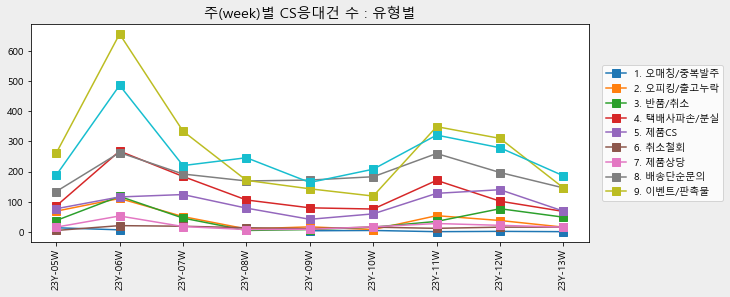

In [109]:
mpl.rc('figure', figsize=(10, 4))
fig = plt.figure( facecolor='#eeeeee')
plt.plot(pivot_df9, marker="s", markersize  = 8)
# lgd = plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fancybox=True, shadow=True, ncol=1,fontsize='large')
plt.legend(loc = 'right', bbox_to_anchor=(1.25, 0.5), labels=labels)
plt.title('주(week)별 CS응대건 수 : 유형별', size='x-large')
plt.xticks(rotation=90)
plt.show()

<Figure size 720x288 with 0 Axes>

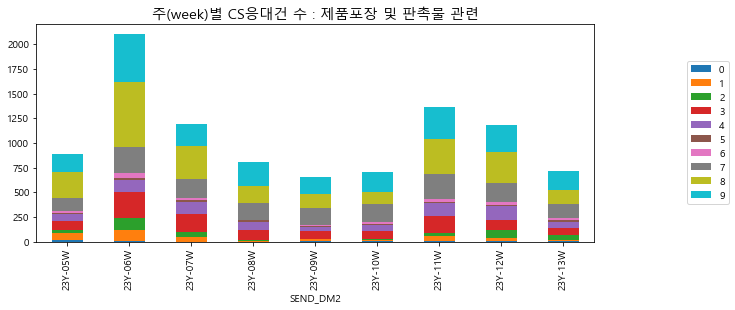

In [110]:
mpl.rc('figure', figsize=(10, 4))
fig = plt.figure( facecolor='#eeeeee')
# fig.patch.set_facecolor('#eeeeee')
pivot_df9.plot.bar(stacked=True )
plt.title('주(week)별 CS응대건 수 : 제품포장 및 판촉물 관련', size='x-large')
plt.xticks(rotation=90)
plt.legend(loc = 'right', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [111]:
s_dt1= (datetime.today()- timedelta(0)).strftime('%Y%m%d')

excel_name = s_dt1+ '_review_data9_temp.xlsx'
writer = pd.ExcelWriter(excel_name)

df9.to_excel(writer, 'CS')
# df_down4.to_excel(writer, '추가')
df_live.to_excel(writer, 'live')

writer.save()
writer.close()

In [112]:
df[df['리뷰등록일2'] =='2023-01']

,상품번호,상품명,구매자평점,포토/영상,리뷰상세내용,등록자,리뷰등록일1,리뷰등록일2,리뷰등록일3,PRODUCT_CODE,product_nm,token,token_attribution,lenght,token_attribution2,GROUP2,GROUP1,KEYWORD


In [113]:
s_dt1= (datetime.today()- timedelta(0)).strftime('%Y%m%d')

excel_name = s_dt1+ '_review_data9_temp.xlsx'
writer = pd.ExcelWriter(excel_name)

df[df['리뷰등록일2'] =='2023-01'].to_excel(writer, 'CS')
# df_down4.to_excel(writer, '추가')
# df_live.to_excel(writer, 'live')

writer.save()
writer.close()

In [114]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# from sentence_transformers import SentenceTransformer

import networkx as nx
from pyvis.network import Network
import nltk

In [115]:
# def df_to_network(token_list, keyword):
#     n_gram_range = (2, 2)
#     count = CountVectorizer(ngram_range=n_gram_range).fit([listToString(token_list)])
#     candidates = count.get_feature_names_out()
#     df_01 = pd.DataFrame(candidates)
#     df_01.rename(columns = {0 : 'text_0'}, inplace =True)
#     df_01['text_'] = df_01['text_0']
#     df_01 = pd.concat([df_01['text_'],df_01['text_0'].str.split(' ', expand=True)], axis=1)
#     df_01.rename(columns = {0 : 'from', 1 : 'to', }, inplace =True)
    
#     mpl.rc('figure', figsize=(7, 7), facecolor='#eeeeee' )
#     G = nx.from_pandas_edgelist(df_01[df_01['from'] ==keyword], 'from', 'to', create_using=nx.Graph())
#     color_map = []
#     for node in G:
#         if node == keyword:
#             color_map.append('#FF8EBA')
#         else: 
#             color_map.append('#33A8FF')
#     nx.draw(G, node_color=color_map, with_labels=True, edgecolors='gray', font_family=font_name, node_size = 1500, node_shape ='o')
#     plt.title('[{}] 키워드의 연관단어 (Top 25)'.format(keyword),fontsize='x-large')
#     plt.show()
#     return 

In [116]:
# df_down1.GROUP2.unique()

In [117]:
# doc = listToString(df_down1[df_down1['token'].str.contains('배송') & df_down1['token'].str.contains('만족')]['token'])
# doc = listToString(df_down1['token'])

In [118]:
# tokenized_doc = twitter.pos(doc,  norm=True, stem=True)
# tokenized_nouns = ' '.join([word[0] for word in tokenized_doc if (word[1] == 'Noun') |  (word[1] == 'Adjective')])

In [119]:
# tokenized_nouns

In [120]:
def df_to_network2(dataset, keyword, stop_word, keyword_dt, threshold):
    tokenized_doc = twitter.pos(listToString(dataset['리뷰상세내용'].str.replace('\n', ' ')), norm=False, stem=True)
    tokenized_nouns = [] 
    tokenized_nouns += ([word[0] for word in tokenized_doc if (word[1] == 'Noun') | (word[1] == 'Adjective')])
    
    #nltk 
    bigrams = nltk.bigrams(tokenized_nouns)
    frequence = nltk.FreqDist(bigrams)
    
    # DataFrame
    df_01 = pd.DataFrame.from_dict([frequence]).T.reset_index().sort_values(by = 0, ascending = False)
    df_01['From'] = df_01['index'].str[0]
    df_01['To'] = df_01['index'].str[1] 
    df_01['From_LEN'] = df_01['From'].str.len()
    df_01 = df_01[df_01['From_LEN'] >= 2]
    df_01['To_LEN'] = df_01['To'].str.len()
    df_01 = df_01[df_01['To_LEN'] >= 2]
    df_01.rename(columns = {0 : 'weight'}, inplace =True)
    df_01 = df_01[['From', 'To', 'weight']].reset_index(drop=True)
    df_01 = df_01[df_01['weight']>= threshold]
    for t_ in stop_word:
        df_01 = df_01[~(df_01['From'].str.contains(t_) | df_01['To'].str.contains(t_) ) ]
    
    df_t = df_01[df_01['From']==keyword].reset_index(drop=True)
    sec_list = list(df_01[df_01['From']==keyword]['To'])
    for k in sec_list:
        df_a = df_01[df_01['From']==k].reset_index(drop=True)
        df_t = df_t.append(df_a)
    
    mpl.rc('figure', figsize=(20, 20), facecolor='#eeeeee' )
    G = nx.from_pandas_edgelist(df_t, 'From', 'To',  edge_attr=["weight"], create_using=nx.Graph())
    color_map = []
    node_size = [] 
    for node in G:
        if node == keyword:
            color_map.append('#c8cbcc')
            node_size.append(2000)
        elif node in pos_word:
            color_map.append('#FF8EBA')
            node_size.append(700)
        else:
            color_map.append('#33A8FF')
            node_size.append(700)
    nx.draw_networkx(G, node_color=color_map, with_labels=True, edgecolors='gray', font_family=font_name, 
                     node_size = node_size, node_shape ='o', width = list(df_t['weight']*0.2) )
    plt.title('[{}] 키워드의 연관단어* : {} 기준'.format(keyword, keyword_dt),fontsize='x-large')
    return

In [121]:
doc_time = end_wt
stop_word = ['어요', '어서', '해주', '있다', '하니', '까지', '라서' , '고배', '먹기', '없다', '아해', '은제', '아하', '기전', '이다', 
             '같다', '아주']

pos_word = ['감사', '빠르다', '빨르다', '좋다', '만족', '깔끔하다', '감동' , '짧다', '길다', '넉넉하다', '관찮다',
            '저렴', '착하다', '많다', '특템',  '튼튼하다', '괜찮다', '훌륭하다', '편하다', '괜찮다', '재구매']


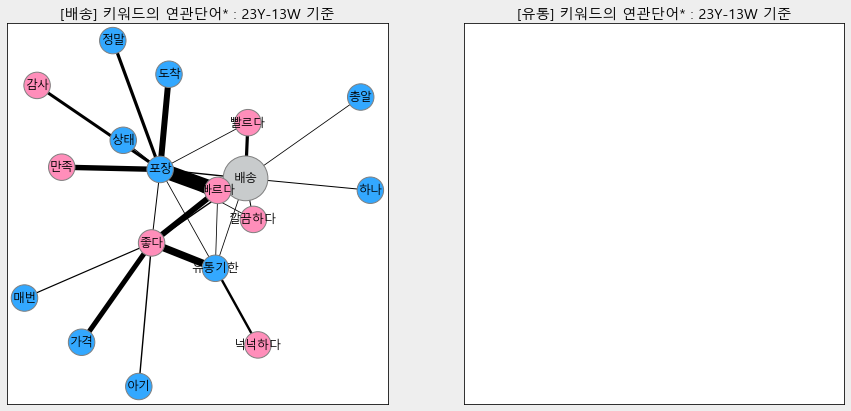

In [122]:
# (none)
mpl.rc('figure', figsize=(15,7), facecolor='#eeeeee' )
plt.subplot(1,2,1); df_to_network2(df_down1, '배송', stop_word, doc_time, 4)
plt.subplot(1,2,2); df_to_network2(df_down1, '유통', stop_word, doc_time, 4)

plt.show()

In [123]:
def df_to_network3(dataset, keyword, stop_word, keyword_dt, threshold):
    tokenized_doc = twitter.pos(listToString(dataset['리뷰상세내용'].str.replace('\n', ' ')), norm=False, stem=True)
    tokenized_nouns = [] 
    tokenized_nouns += ([word[0] for word in tokenized_doc if (word[1] == 'Noun') | (word[1] == 'Adjective')])
    
    #nltk 
    bigrams = nltk.bigrams(tokenized_nouns)
    frequence = nltk.FreqDist(bigrams)
    
    # DataFrame
    df_01 = pd.DataFrame.from_dict([frequence]).T.reset_index().sort_values(by = 0, ascending = False)
    df_01['From'] = df_01['index'].str[0]
    df_01['To'] = df_01['index'].str[1] 
    df_01['From_LEN'] = df_01['From'].str.len()
    df_01 = df_01[df_01['From_LEN'] >= 2]
    df_01['To_LEN'] = df_01['To'].str.len()
    df_01 = df_01[df_01['To_LEN'] >= 2]
    df_01.rename(columns = {0 : 'weight'}, inplace =True)
    df_01 = df_01[['From', 'To', 'weight']].reset_index(drop=True)
    df_01 = df_01[df_01['weight']>= threshold]
    for t_ in stop_word:
        df_01 = df_01[~(df_01['From'].str.contains(t_) | df_01['To'].str.contains(t_) ) ]
    
    df_t = df_01[df_01['From']==keyword].reset_index(drop=True)
    sec_list = list(df_01[df_01['From']==keyword]['To'])
    for k in sec_list:
        df_a = df_01[df_01['From']==k].reset_index(drop=True)
        df_t = df_t.append(df_a)
    
    mpl.rc('figure', figsize=(20, 20), facecolor='#eeeeee' )
    G = nx.from_pandas_edgelist(df_t, 'From', 'To',  edge_attr=["weight"], create_using=nx.Graph())
    color_map = []
    node_size = [] 
    for node in G:
        if node == keyword:
            color_map.append('#c8cbcc')
            node_size.append(2000)
        elif node in pos_word:
            color_map.append('#FF8EBA')
            node_size.append(700)
        else:
            color_map.append('#33A8FF')
            node_size.append(700)
    nx.draw_networkx(G, node_color=color_map, with_labels=True, edgecolors='gray', font_family=font_name, 
                     node_size = node_size, node_shape ='o', width = list(df_t['weight']*0.1) )
    plt.title('[{}] 키워드의 연관단어* : {} 기준'.format(keyword, keyword_dt),fontsize='x-large')
    return

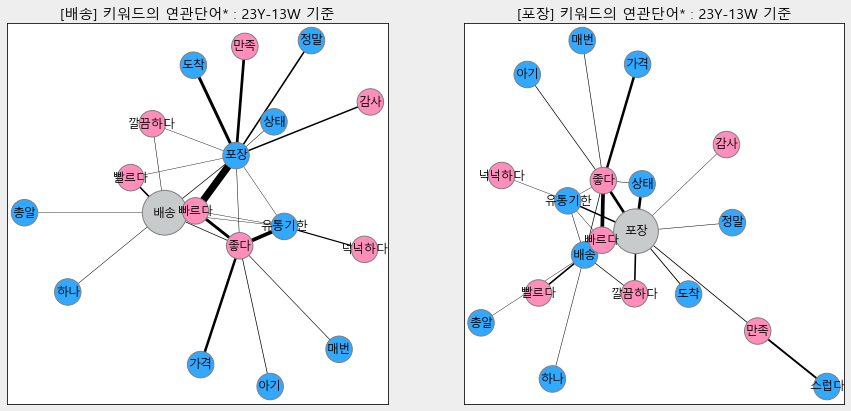

In [150]:
# shell_layout
mpl.rc('figure', figsize=(15,7))
plt.subplot(1,2,1); df_to_network3(df_down1, '배송', stop_word, doc_time, 4)
plt.subplot(1,2,2); df_to_network3(df_down1, '포장', stop_word, doc_time, 4)
plt.show()

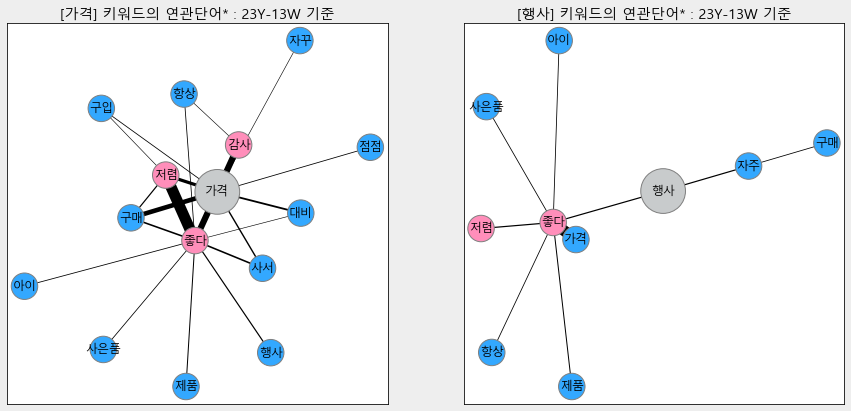

In [154]:
mpl.rc('figure', figsize=(15,7))
plt.subplot(1,2,1); df_to_network2(df_down2, '가격', stop_word, doc_time, 3)
plt.subplot(1,2,2); df_to_network2(df_down2, '행사', stop_word, doc_time, 3)
plt.show()

In [126]:
tokenized_doc = twitter.pos(listToString(df_down2['리뷰상세내용'].str.replace('\n', ' ')), norm=False, stem=True)
tokenized_nouns = [] 
tokenized_nouns += ([word[0] for word in tokenized_doc if (word[1] == 'Noun') | (word[1] == 'Adjective')])

#nltk 
bigrams = nltk.bigrams(tokenized_nouns)
frequence = nltk.FreqDist(bigrams)

# DataFrame
df_01 = pd.DataFrame.from_dict([frequence]).T.reset_index().sort_values(by = 0, ascending = False)
df_01['From'] = df_01['index'].str[0]
df_01['To'] = df_01['index'].str[1] 
df_01['From_LEN'] = df_01['From'].str.len()
df_01 = df_01[df_01['From_LEN'] >= 2]
df_01['To_LEN'] = df_01['To'].str.len()
df_01 = df_01[df_01['To_LEN'] >= 2]
df_01.rename(columns = {0 : 'weight'}, inplace =True)
df_01 = df_01[['From', 'To', 'weight']].reset_index(drop=True)
df_01 = df_01[df_01['weight']>= 2]
for t_ in stop_word:
    df_01 = df_01[~(df_01['From'].str.contains(t_) | df_01['To'].str.contains(t_) ) ]

In [127]:
df_01.head(5)

,From,To,weight
0,좋다,가격,55
1,저렴,가격,31
2,가격,구매,23
3,가격,좋다,20
5,가격,저렴,16


In [128]:
keyword = '가격'
df_t = df_01[df_01['From']==keyword].reset_index(drop=True)
sec_list = list(df_01[df_01['From']==keyword]['To'])
for k in sec_list:
    df_a = df_01[df_01['From']==k].reset_index(drop=True)
    df_t = df_t.append(df_a)

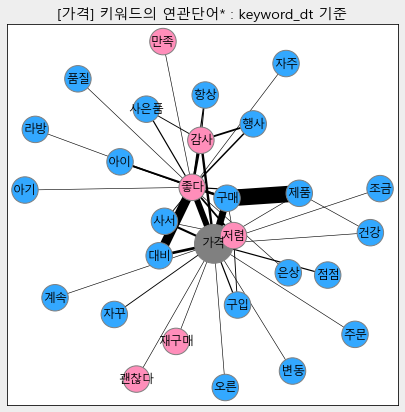

In [129]:
G = nx.from_pandas_edgelist(df_t, 'From', 'To',  edge_attr=["weight"], create_using=nx.Graph())
color_map = []
node_size = [] 
for node in G:
    if node == keyword:
        color_map.append('gray')
        node_size.append(1500)
    elif node in pos_word:
        color_map.append('#FF8EBA')
        node_size.append(700)
    else:
        color_map.append('#33A8FF')
        node_size.append(700)

mpl.rc('figure', figsize=(7, 7), facecolor='#eeeeee' )
nx.draw_networkx(G, node_color=color_map, with_labels=True, edgecolors='gray', font_family=font_name, 
                 node_size = node_size, node_shape ='o', width = list(df_t['weight']*0.3) )
plt.title('[{}] 키워드의 연관단어* : {} 기준'.format(keyword, 'keyword_dt'),fontsize='x-large')
plt.show()

In [130]:
[print(x) for x in pos_word if x == node ]

만족


[None]

In [131]:
for x in pos_word:
    if x == node:
        color_map.append('#FF8EBA')
        node_size.append(700)

In [132]:
for node in G:
    print(node)

가격
구매
좋다
저렴
대비
감사
사서
구입
점점
자꾸
변동
주문
재구매
괜찮다
오른
건강
조금
계속
제품
아이
행사
항상
사은품
라방
자주
은상
품질
아기
만족
